In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [3]:
X

array([[  7.12731332,  -4.4394424 ],
       [  6.68873898,  -2.44840134],
       [ -1.1004791 ,  -7.78436803],
       [  3.99337867,  -4.90451269],
       [ -1.8171622 ,  -9.22909875],
       [ -2.05521901, -10.23141199],
       [  4.20397723,  -3.61164749],
       [ -0.21804625,  -9.21962706],
       [  5.19327641,  -6.38845134],
       [ -1.83682056,  -8.21952131],
       [  7.54287406,  -5.35284052],
       [  4.88954545,  -3.38947816],
       [ -1.76558632,  -9.34943001],
       [  5.22597752,  -5.5503347 ],
       [  6.64886376,  -4.46203664],
       [  8.09408178,  -4.8068287 ],
       [  6.32916529,  -5.32177094],
       [  5.80670214,  -5.14475233],
       [  5.67381136,  -3.33963413],
       [  7.20870152,  -6.04176429],
       [ -3.25014567,  -8.67304842],
       [ -1.22856371,  -7.96317275],
       [ -3.29446134,  -7.45269997],
       [ -1.81294631,  -7.55640734],
       [ -1.53809058,  -8.77828137],
       [ -3.78288052,  -9.38303174],
       [ -2.73473836,  -9.34777956],
 

In [4]:
y

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
        1, -1,  1, -1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1, -1])

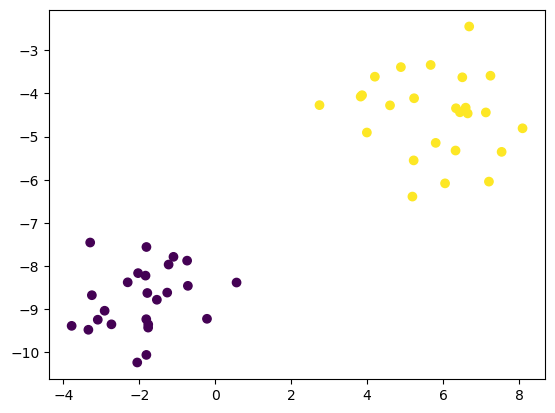

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

In [6]:
def fit_svm(X, y, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    n_samples, n_features = X.shape
    y_ = np.where(y <= 0, -1, 1)
    # init weights
    w = np.zeros(n_features)
    b = 0
    for _ in range(n_iters):
        for idx, x_i in enumerate(X):
            condition = y_[idx] * (np.dot(x_i, w) - b) >= 1
            if condition:
                w -= learning_rate * (2 * lambda_param * w)
            else:
                w -= learning_rate * (2 * lambda_param * w - np.dot(x_i, y_[idx]))
                b -= learning_rate * y_[idx]
                
    return w, b

In [7]:
def predict_svm(X, w, b):
    approx = np.dot(X, w) - b
    return np.sign(approx)

In [8]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [9]:
w, b = fit_svm(X_train, y_train)
predictions = predict_svm(X_test, w, b)
print("SVM classification accuracy", accuracy(y_test, predictions))

SVM classification accuracy 1.0


In [10]:
def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

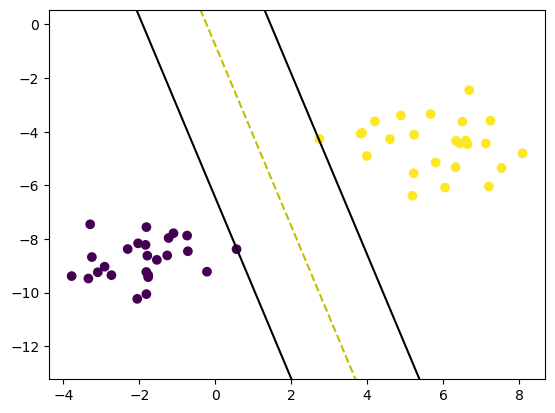

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, w, b, 0)
x1_2 = get_hyperplane_value(x0_2, w, b, 0)

x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.show()


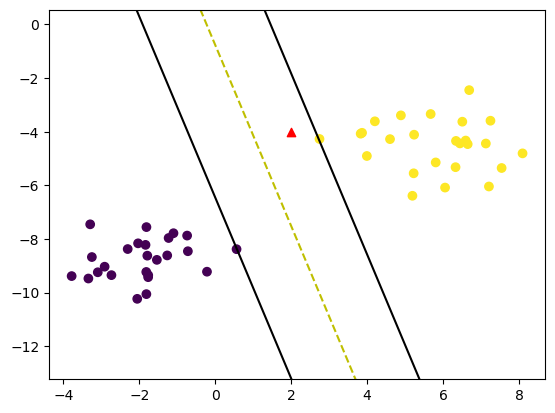

In [19]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = get_hyperplane_value(x0_1, w, b, 0)
x1_2 = get_hyperplane_value(x0_2, w, b, 0)

x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
x1_2_m = get_hyperplane_value(x0_2, w, b, -1)

x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
x1_2_p = get_hyperplane_value(x0_2, w, b, 1)

ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

x1_min = np.amin(X[:, 1])
x1_max = np.amax(X[:, 1])
ax.set_ylim([x1_min - 3, x1_max + 3])

plt.scatter( 2, -4 ,color='r',marker='^')

plt.show()